# Spatial correlation analysis

In [1]:
import os
import sys
import yaml
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu

### Load config

In [2]:
config_name = os.path.realpath('plot_config.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

### Figure settings

In [3]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = conf['figure']['keys']['dpi']
else:
    dpi_ = 75

### Load spatial correlation data

In [4]:
coor_ERA5 = np.load(conf['data']['save_loc'] + 'CORR_CREDIT_2020_2022_ERA5.npy', allow_pickle=True)[()]
coor_models = np.load(conf['data']['save_loc'] + 'CORR_CREDIT_2020_2022_models.npy', allow_pickle=True)[()]

In [5]:
my_colors = gu.ksha_color_set_summon(color_set=0)

red = my_colors['red']
blue = my_colors['blue']
orange = my_colors['orange']

## Plot

[None, None, None, None]

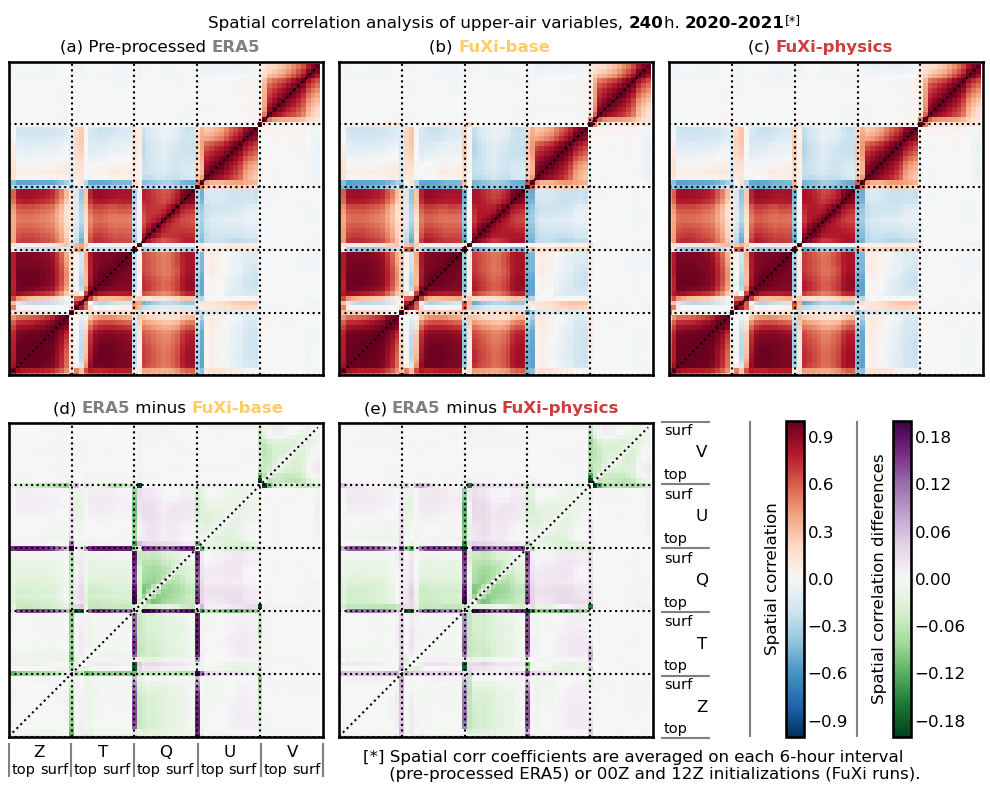

In [6]:
handles = []
h_ratios = [1, 0.15, 1]
w_ratios = [1, 0.05, 1, 0.05, 1]

N_frames = 5
N_vars = coor_ERA5['ERA5_6h'].shape[0]
N_levels = 13
x_ticks = np.arange(N_vars)

fig = plt.figure(figsize=(13, 9), dpi=dpi_)
gs = gridspec.GridSpec(len(h_ratios), len(w_ratios),
                       height_ratios=h_ratios, width_ratios=w_ratios)

ind_x = [0, 2]
ind_y = [0, 2, 4]

AX = np.zeros((len(ind_x), len(ind_y)), dtype=object)
AX_flat = []

# Create main axes
count = 0
for ix, ix_gs in enumerate(ind_x):
    for iy, iy_gs in enumerate(ind_y):
        if count < N_frames:
            ax_main = plt.subplot(gs[ix_gs, iy_gs])
            AX[ix][iy] = ax_main
            AX_flat.append(ax_main)
            count += 1

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

# config all axes in AX_flat
for i_ax, ax in enumerate(AX_flat):
    ax = gu.ax_decorate_box(ax)
    ax.grid(linestyle=':', color='k', linewidth=2, axis='both')
    ax.set_aspect('equal', 'box')
    ax.set_xlim([0, N_vars])
    ax.set_xticks(x_ticks[::N_levels])
    ax.set_ylim([0, N_vars])
    ax.set_yticks(x_ticks[::N_levels])
    ax.plot(x_ticks, x_ticks, linestyle=':', color='k', linewidth=2)

# ----------------------------------- #
# correlation vals
CS1 = AX[0][0].pcolormesh(x_ticks, x_ticks, coor_ERA5['ERA5_6h'], 
                          vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

AX[0][1].pcolormesh(x_ticks, x_ticks, coor_models['fuxi_dry'], 
                    vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

AX[0][2].pcolormesh(x_ticks, x_ticks, coor_models['fuxi_physics'], 
                    vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

# ----------------------------------- #

CS2 = AX[1][0].pcolormesh(x_ticks, x_ticks, 
                          coor_ERA5['ERA5_6h']-coor_models['fuxi_dry'], 
                          vmin=-0.2, vmax=0.2, cmap=plt.cm.PRGn_r)

AX[1][1].pcolormesh(x_ticks, x_ticks,
                    coor_ERA5['ERA5_6h']-coor_models['fuxi_physics'], 
                    vmin=-0.2, vmax=0.2, cmap=plt.cm.PRGn_r)

# title strings
ax_title1 = fig.add_axes([0.0, 1.02, 1.0, 0.06])
title_len = 0.59
fontsize_list = [16,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 0.8, 'left', 'top', 
                                    ['Spatial correlation analysis of upper-air variables, ', 
                                     '240', 'h. ', '2020-2021',], 
                                    ['k', 'k', 'k', 'k'], 
                                    fontsize_list, fontweight_list)
ax_title1.text(0.813, 0.83, '[*]', ha='right', va='top', fontsize=12, transform=ax_title1.transAxes);


ax_title2 = fig.add_axes([0.0, 0.99, 1/3, 0.06])
ax_title3 = fig.add_axes([1/3, 0.99, 1/3, 0.06])
ax_title4 = fig.add_axes([2/3, 0.99, 1/3, 0.06])

ax_title5 = fig.add_axes([0.0, 0.455, 1/3, 0.06])
ax_title6 = fig.add_axes([1/3, 0.455, 1/3, 0.06])

title_len = 0.68
handles += gu.string_partial_format(
    fig, ax_title2, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(a) Pre-processed ', 'ERA5',], 
    ['k', '0.5',], 
    fontsize_list, 
    fontweight_list
)

title_len = 0.41
handles += gu.string_partial_format(
    fig, ax_title3, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(b) ', 'FuXi-base',], 
    ['k', orange,], 
    fontsize_list, 
    fontweight_list
)

title_len = 0.45
handles += gu.string_partial_format(
    fig, ax_title4, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(c) ', 'FuXi-physics',], 
    ['k', red,], 
    fontsize_list, 
    fontweight_list
)

title_len = 0.725
handles += gu.string_partial_format(
    fig, ax_title5, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(d) ', 'ERA5', ' minus ', 'FuXi-base'], 
    ['k', '0.5', 'k', orange], 
    fontsize_list, 
    fontweight_list
)

title_len = 0.815
handles += gu.string_partial_format(
    fig, ax_title6, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(e) ', 'ERA5', ' minus ', 'FuXi-physics'], 
    ['k', '0.5', 'k', red], 
    fontsize_list, 
    fontweight_list
)

# ----------------------------------- #
# correlation colorbar
ax_base1 = fig.add_axes([2/3+0.131, 0, 0.06, 1/2-0.033])
ax_base1.tick_params(axis='both', left=False, top=False, right=False, bottom=False, 
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax1 = inset_axes(ax_base1, height='100%', width='30%', borderpad=0, loc=2)
CBar1 = plt.colorbar(CS1, orientation='vertical', cax=cax1, ticks=[-0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9])
CBar1.ax.tick_params(axis='y', labelsize=16, direction='in', length=0)
CBar1.outline.set_linewidth(2.5)
CBar1.ax.set_ylabel('Spatial correlation', fontsize=16, labelpad=-80)

# ----------------------------------- #
# correlation difference colorbar
ax_base2 = fig.add_axes([2/3+0.241, 0, 0.06, 1/2-0.033])
ax_base2.tick_params(axis='both', left=False, top=False, right=False, bottom=False, 
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax2 = inset_axes(ax_base2, height='100%', width='30%', borderpad=0, loc=2)
CBar2 = plt.colorbar(CS2, orientation='vertical', cax=cax2, ticks=[-0.18, -0.12, -0.06, 0, 0.06, 0.12, 0.18]) #
CBar2.ax.tick_params(axis='y', labelsize=16, direction='in', length=0)
CBar2.outline.set_linewidth(2.5)
CBar2.ax.set_ylabel('Spatial correlation differences', fontsize=16, labelpad=-90)

# ----------------------------------- #
# lines that divide the two colorbars

ax_base3 = fig.add_axes([2/3+0.061, 0, 0.06, 1/2-0.033])
ax_base3.axvline(x=0.55, color='0.5', linestyle='-', linewidth=2)

ax_base4 = fig.add_axes([2/3+0.171, 0, 0.06, 1/2-0.033])
ax_base4.axvline(x=0.55, color='0.5', linestyle='-', linewidth=2)

# ----------------------------------- #
# label bottom
ax_base5 = fig.add_axes([-0.001, -0.06, 1/3-0.01+0.002, 0.05])

loc_x = [0.1, 0.3, 0.5, 0.7, 0.9]
loc_lines = [0.005, 0.2, 0.4, 0.6, 0.8, 0.995]
label_names = ['Z', 'T', 'Q', 'U', 'V']

for ix, loc in enumerate(loc_x): 
    ax_base5.text(loc, 0.95, label_names[ix], ha='center', va='top', 
                  fontsize=16, transform=ax_base5.transAxes)
    
for ix, loc in enumerate(loc_lines):
    ax_base5.axvline(x=loc, color='0.5', linestyle='-', linewidth=2)
    if ix < 5:
        ax_base5.text(loc+0.008, 0, 'top', ha='left', va='bottom', fontsize=14, transform=ax_base5.transAxes)
        ax_base5.text(loc+0.186, 0, 'surf', ha='right', va='bottom', fontsize=14, transform=ax_base5.transAxes)
        
# ----------------------------------- #
# label right y-axis
ax_base6 = fig.add_axes([2/3+0.003, 0-0.005, 0.05, 1/2-0.033+0.006])

loc_y = [0.1, 0.3, 0.5, 0.7, 0.9]
loc_lines = [0.005, 0.2, 0.4, 0.6, 0.8, 0.995]
label_names = ['Z', 'T', 'Q', 'U', 'V']

# Add text labels on the right y-axis
for ix, loc in enumerate(loc_y): 
    ax_base6.text(0.95, loc, label_names[ix], ha='right', va='center', 
                  fontsize=16, transform=ax_base6.transAxes)

# Draw horizontal lines and add text labels for 'top' and 'surf'
for ix, loc in enumerate(loc_lines):
    ax_base6.axhline(y=loc, color='0.5', linestyle='-', linewidth=2)
    if ix < 5:
        ax_base6.text(0.05, loc+0.008, 'top', ha='left', va='bottom', fontsize=14, transform=ax_base6.transAxes)
        ax_base6.text(0.05, loc+0.19, 'surf', ha='left', va='top', fontsize=14, transform=ax_base6.transAxes)

ax_words1 = fig.add_axes([1/3+0.03, -0.08, 0.57, 0.06])
ax_words1.text(
    0, 1, 
    '[*] Spatial corr coefficients are averaged on each 6-hour interval\n'
    '     (pre-processed ERA5) or 00Z and 12Z initializations (FuXi runs).',
    ha='left', 
    va='top', 
    fontsize=16, 
    transform=ax_words1.transAxes
)

# ----------------------------------- #
# turn-off sub axis
ax_title1.set_axis_off()
ax_title2.set_axis_off()
ax_title3.set_axis_off()
ax_title4.set_axis_off()
ax_title5.set_axis_off()
ax_title6.set_axis_off()
ax_base3.set_axis_off()
ax_base4.set_axis_off()
ax_base5.set_axis_off()
ax_base6.set_axis_off()
ax_words1.set_axis_off()
[j.set_linewidth(0.0) for j in ax_base1.spines.values()]
[j.set_linewidth(0.0) for j in ax_base2.spines.values()]

## Plot (x)

[None, None, None, None]

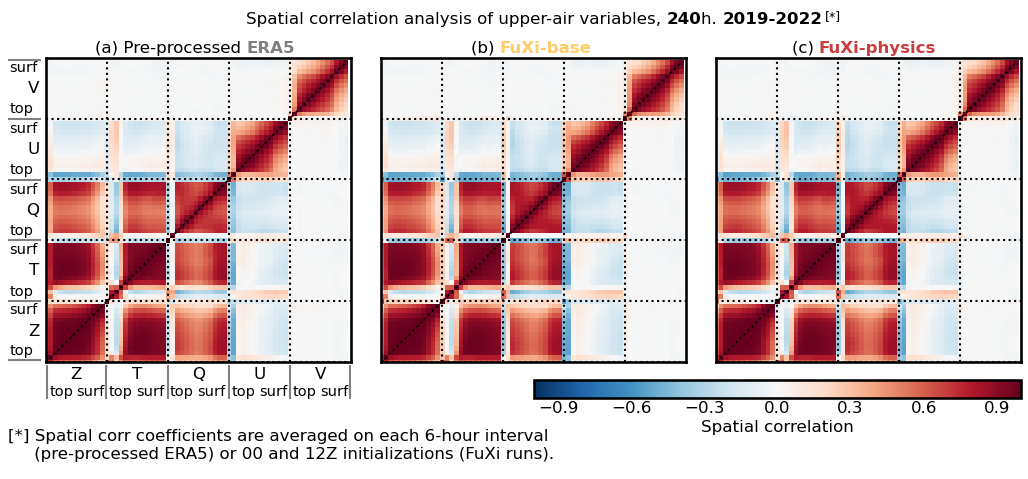

In [6]:
handles = []

N_vars = coor_ERA5['ERA5_6h'].shape[0]
N_levels = 13
x_ticks = np.arange(N_vars)

fig = plt.figure(figsize=(13, 4.5), dpi=dpi_)
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

# create main axes
AX_all = []
AX_all.append(plt.subplot(gs[0, 0]))
AX_all.append(plt.subplot(gs[0, 1]))
AX_all.append(plt.subplot(gs[0, 2]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.1)

# config all axes in AX_flat
for i_ax, ax in enumerate(AX_all):
    ax = gu.ax_decorate_box(ax)
    ax.grid(linestyle=':', color='k', linewidth=2, axis='both')
    ax.set_aspect('equal', 'box')
    ax.set_xlim([0, N_vars])
    ax.set_xticks(x_ticks[::N_levels])
    ax.set_ylim([0, N_vars])
    ax.set_yticks(x_ticks[::N_levels])
    ax.plot(x_ticks, x_ticks, linestyle=':', color='k', linewidth=2)

# ----------------------------------- #
# correlation vals
CS1 = AX_all[0].pcolormesh(x_ticks, x_ticks, coor_ERA5['ERA5_6h'], 
                           vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

AX_all[1].pcolormesh(x_ticks, x_ticks, coor_models['fuxi_dry'], 
                     vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

AX_all[2].pcolormesh(x_ticks, x_ticks, coor_models['fuxi_physics'], 
                     vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

# ----------------------------------- #
# title strings
ax_title1 = fig.add_axes([0.0, 1.04, 1.0, 0.06])
title_len = 0.59
fontsize_list = [16,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 0.8, 'left', 'top', 
                                    ['Spatial correlation analysis of upper-air variables, ', 
                                     '240', 'h. ', '2019-2022',], 
                                    ['k', 'k', 'k', 'k'], 
                                    fontsize_list, fontweight_list)
ax_title1.text(0.815, 0.875, '[*]', ha='right', va='top', fontsize=12, transform=ax_title1.transAxes);


ax_title2 = fig.add_axes([0.0, 0.96, 1/3-(0.06/3.1), 0.06])
ax_title3 = fig.add_axes([1/3+(0.03/3.1), 0.96, 1/3-(0.06/3.1), 0.06])
ax_title4 = fig.add_axes([2/3+(0.06/3.1), 0.96, 1/3-(0.06/3.1), 0.06])

title_len = 0.68
handles += gu.string_partial_format(
    fig, ax_title2, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(a) Pre-processed ', 'ERA5',], 
    ['k', '0.5',], 
    fontsize_list, 
    fontweight_list
)

title_len = 0.41
handles += gu.string_partial_format(
    fig, ax_title3, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(b) ', 'FuXi-base',], 
    ['k', orange,], 
    fontsize_list, 
    fontweight_list
)

title_len = 0.5
handles += gu.string_partial_format(
    fig, ax_title4, 0.5*(1-title_len), 0.7, 'left', 'top', 
    ['(c) ', 'FuXi-physics',], 
    ['k', red,], 
    fontsize_list, 
    fontweight_list
)

# ----------------------------------- #
# correlation colorbar
ax_base1 = fig.add_axes([1/2, -0.175, 1/2, 0.17])
ax_base1.tick_params(axis='both', left=False, top=False, right=False, bottom=False, 
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax1 = inset_axes(ax_base1, height='30%', width='100%', borderpad=0, loc=2)
CBar1 = plt.colorbar(CS1, orientation='horizontal', cax=cax1, ticks=[-0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9])
CBar1.ax.tick_params(axis='x', labelsize=16, direction='in', length=0)
CBar1.outline.set_linewidth(2.5)
CBar1.ax.set_xlabel('Spatial correlation', fontsize=16)

# ----------------------------------- #
# label bottom
ax_base5 = fig.add_axes([-0.001, -0.06, 1/3-(0.06/3.1), 0.1])

loc_x = [0.1, 0.3, 0.5, 0.7, 0.9]
loc_lines = [0.005, 0.2, 0.4, 0.6, 0.8, 0.995]
label_names = ['Z', 'T', 'Q', 'U', 'V']

for ix, loc in enumerate(loc_x): 
    ax_base5.text(loc, 0.95, label_names[ix], ha='center', va='top', 
                  fontsize=16, transform=ax_base5.transAxes)
    
for ix, loc in enumerate(loc_lines):
    ax_base5.axvline(x=loc, color='0.5', linestyle='-', linewidth=2)
    if ix < 5:
        ax_base5.text(loc+0.008, 0, 'top', ha='left', va='bottom', fontsize=14, transform=ax_base5.transAxes)
        ax_base5.text(loc+0.19, 0, 'surf', ha='right', va='bottom', fontsize=14, transform=ax_base5.transAxes)
        
# ----------------------------------- #
# label right y-axis
ax_base6 = fig.add_axes([-0.1*(4.5/13)-0.005, 0.05, 0.1*(4.5/13), 0.9])

loc_y = [0.1, 0.3, 0.5, 0.7, 0.9]
loc_lines = [0.005, 0.2, 0.4, 0.6, 0.8, 0.995]
label_names = ['Z', 'T', 'Q', 'U', 'V']

# Add text labels on the right y-axis
for ix, loc in enumerate(loc_y): 
    ax_base6.text(0.95, loc, label_names[ix], ha='right', va='center', 
                  fontsize=16, transform=ax_base6.transAxes)

# Draw horizontal lines and add text labels for 'top' and 'surf'
for ix, loc in enumerate(loc_lines):
    ax_base6.axhline(y=loc, color='0.5', linestyle='-', linewidth=2)
    if ix < 5:
        ax_base6.text(0.05, loc+0.008, 'top', ha='left', va='bottom', fontsize=14, transform=ax_base6.transAxes)
        ax_base6.text(0.05, loc+0.19, 'surf', ha='left', va='top', fontsize=14, transform=ax_base6.transAxes)

ax_words1 = fig.add_axes([-0.1*(4.5/13)-0.005, -0.275, 0.57, 0.125])
ax_words1.text(
    0, 1, 
    '[*] Spatial corr coefficients are averaged on each 6-hour interval\n'
    '     (pre-processed ERA5) or 00 and 12Z initializations (FuXi runs).',
    ha='left', 
    va='top', 
    fontsize=16, 
    transform=ax_words1.transAxes
)

# ----------------------------------- #
# turn-off sub axis
ax_title1.set_axis_off()
ax_title2.set_axis_off()
ax_title3.set_axis_off()
ax_title4.set_axis_off()
ax_base5.set_axis_off()
ax_base6.set_axis_off()
ax_words1.set_axis_off()
[j.set_linewidth(0.0) for j in ax_base1.spines.values()]